In [1]:
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*
!pip install xgboost
!pip install pdpbox
!pip install shap

  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Running setup.py clean for matplotlib
Failed to build matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.2
    Uninstalling matplotlib-3.4.2:
      Successfully uninstalled matplotlib-3.4.2
    Running setup.py install for matplotlib: started
    Running setup.py install for matplotlib: finished with status 'error'
  Rolling back uninstall of matplotlib
  Moving to c:\users\me\anaconda3\lib\site-packages\__pycache__\pylab.cpython-38.pyc
   from C:\Users\me\AppData\Local\Temp\pip-uninstall-hbxfep8b\pylab.cpython-38.pyc
  Moving to c:\users\me\anaconda3\lib\site-packages\matplotlib-3.4.2-py3.8-nspkg.pth
   from C:\Users\me\AppData\Local\Temp\pip-uninstall-7wqi5bdq\matplotlib-3.4.2-py3.8-nspkg.pth
  Moving to c:\users\me\anaconda3\lib\site-packages\matplotlib-3.4.2.dist-info\
   from C:\Users\me\anaconda3\Lib\site-packages\~~tplotlib-3.4.2.dist-info
  Moving to c:\users\me\anaconda3\lib\site-pack

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\me\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\me\\AppData\\Local\\Temp\\pip-install-txjkcbn8\\matplotlib_0950999fe8934f4090e308418c998d7e\\setup.py'"'"'; __file__='"'"'C:\\Users\\me\\AppData\\Local\\Temp\\pip-install-txjkcbn8\\matplotlib_0950999fe8934f4090e308418c998d7e\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\me\AppData\Local\Temp\pip-wheel-hcu6swiw'
       cwd: C:\Users\me\AppData\Local\Temp\pip-install-txjkcbn8\matplotlib_0950999fe8934f4090e308418c998d7e\
  Complete output (503 lines):
  Edit setup.cfg to change the build options
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.1.1]
        python: yes [3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit
                    (AMD64)]]
      platform: ye

   from C:\Users\me\AppData\Local\Temp\pip-uninstall-7wqi5bdq\matplotlib\__pycache__\mlab.cpython-38.pyc
  Moving to c:\users\me\anaconda3\lib\site-packages\matplotlib\__pycache__\offsetbox.cpython-38.pyc
   from C:\Users\me\AppData\Local\Temp\pip-uninstall-7wqi5bdq\matplotlib\__pycache__\offsetbox.cpython-38.pyc
  Moving to c:\users\me\anaconda3\lib\site-packages\matplotlib\__pycache__\patches.cpython-38.pyc
   from C:\Users\me\AppData\Local\Temp\pip-uninstall-7wqi5bdq\matplotlib\__pycache__\patches.cpython-38.pyc
  Moving to c:\users\me\anaconda3\lib\site-packages\matplotlib\__pycache__\path.cpython-38.pyc
   from C:\Users\me\AppData\Local\Temp\pip-uninstall-7wqi5bdq\matplotlib\__pycache__\path.cpython-38.pyc
  Moving to c:\users\me\anaconda3\lib\site-packages\matplotlib\__pycache__\patheffects.cpython-38.pyc
   from C:\Users\me\AppData\Local\Temp\pip-uninstall-7wqi5bdq\matplotlib\__pycache__\patheffects.cpython-38.pyc
  Moving to c:\users\me\anaconda3\lib\site-packages\matplotlib\__


  copying lib\matplotlib\backends\backend_svg.py -> build\lib.win-amd64-3.8\matplotlib\backends
  copying lib\matplotlib\backends\backend_template.py -> build\lib.win-amd64-3.8\matplotlib\backends
  copying lib\matplotlib\backends\backend_tkagg.py -> build\lib.win-amd64-3.8\matplotlib\backends
  copying lib\matplotlib\backends\backend_tkcairo.py -> build\lib.win-amd64-3.8\matplotlib\backends
  copying lib\matplotlib\backends\backend_webagg.py -> build\lib.win-amd64-3.8\matplotlib\backends
  copying lib\matplotlib\backends\backend_webagg_core.py -> build\lib.win-amd64-3.8\matplotlib\backends
  copying lib\matplotlib\backends\backend_wx.py -> build\lib.win-amd64-3.8\matplotlib\backends
  copying lib\matplotlib\backends\backend_wxagg.py -> build\lib.win-amd64-3.8\matplotlib\backends
  copying lib\matplotlib\backends\backend_wxcairo.py -> build\lib.win-amd64-3.8\matplotlib\backends
  copying lib\matplotlib\backends\qt_compat.py -> build\lib.win-amd64-3.8\matplotlib\backends
  copying lib\

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from category_encoders import OneHotEncoder, OrdinalEncoder
from pandas_profiling import ProfileReport
import datetime as dt

# k-fold CV:
from sklearn.model_selection import cross_val_score, validation_curve

# Hyperparameter tuning:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Library for confusion matrix:
from sklearn.metrics import plot_confusion_matrix, classification_report, roc_curve, plot_roc_curve

# Library for classification metrics:
from sklearn.metrics import precision_score, recall_score

# Boosting & Permutation:
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance

# Partial Dependence Plots (PDP):
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot

# Shapley Plots:
import shap

from joblib import dump

In [3]:
PATH = 'https://github.com/madina-iz/Vaccines-Project/blob/main/'

train_features = PATH + 'training_set_features.csv?raw=true'
train_labels = PATH + 'training_set_labels.csv?raw=true'
test_features = PATH + 'test_set_features.csv?raw=true'

def wrangle(fm_path, tv_path=None):
    if tv_path:
        df = pd.merge(pd.read_csv(fm_path, index_col='respondent_id'), pd.read_csv(tv_path, index_col='respondent_id'), on='respondent_id')
    else:
        df = pd.read_csv(fm_path, index_col='respondent_id')
    
    # Drop columns related to h1n1 as we will be predicting seasonal flu only:
    h1n1_cols = [ df.columns[i] for i in range(len(df.columns)) if 'h1n1' in df.columns[i] ] # Creating a list of columns with 'h1n1' in column names
    df.drop(columns=h1n1_cols, inplace=True)
    
    # Replace missing values with a new class ('missing_cat') - removed the code as it made the model worse:
    # for col in train.columns:
    #    train[col].fillna('missing_cat', inplace=True)
    
    # Drop columns with a high proportion of missing values (about 50%) - removed the code as it made the model worse:
    # df.drop(columns=['employment_industry','employment_occupation'], inplace=True)
    
    # Manually fill NaN's in 'health_insurance' since missing values most likely represent negative answer:
    df['health_insurance'].fillna(0, inplace=True)
        
    return df

In [4]:
# Create a training set dataframe using the wrangle function:
train = wrangle(train_features, train_labels)

In [5]:
train.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,1
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [6]:
train['health_insurance']

respondent_id
0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
26702    0.0
26703    1.0
26704    0.0
26705    0.0
26706    1.0
Name: health_insurance, Length: 26707, dtype: float64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26636 non-null  float64
 1   behavioral_avoidance         26499 non-null  float64
 2   behavioral_face_mask         26688 non-null  float64
 3   behavioral_wash_hands        26665 non-null  float64
 4   behavioral_large_gatherings  26620 non-null  float64
 5   behavioral_outside_home      26625 non-null  float64
 6   behavioral_touch_face        26579 non-null  float64
 7   doctor_recc_seasonal         24547 non-null  float64
 8   chronic_med_condition        25736 non-null  float64
 9   child_under_6_months         25887 non-null  float64
 10  health_worker                25903 non-null  float64
 11  health_insurance             26707 non-null  float64
 12  opinion_seas_vacc_effective  26245 non-null  float64
 13  opinion_seas_ris

In [8]:
# Check the classes distribution in the target variable:
train['seasonal_vaccine'].value_counts(normalize=True)

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

In [9]:
train.nunique()

behavioral_antiviral_meds       2
behavioral_avoidance            2
behavioral_face_mask            2
behavioral_wash_hands           2
behavioral_large_gatherings     2
behavioral_outside_home         2
behavioral_touch_face           2
doctor_recc_seasonal            2
chronic_med_condition           2
child_under_6_months            2
health_worker                   2
health_insurance                2
opinion_seas_vacc_effective     5
opinion_seas_risk               5
opinion_seas_sick_from_vacc     5
age_group                       5
education                       4
race                            4
sex                             2
income_poverty                  3
marital_status                  2
rent_or_own                     2
employment_status               3
hhs_geo_region                 10
census_msa                      3
household_adults                4
household_children              4
employment_industry            21
employment_occupation          23
seasonal_vacci

In [10]:
report = ProfileReport(train, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/38 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##### Create feature matrix X and target vector y:

In [11]:
target = 'seasonal_vaccine'
X = train.drop(columns=[target])
y = train[target]

##### Split the data into training and validation sets using a random split:

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Verify the split:

print(len(X_train) + len(X_test) == len(X))
print(len(y_train) + len(y_test) == len(y))

True
True


##### Establish a baseline accuracy (majority class):

In [14]:
baseline_acc = y_train.value_counts(normalize=True).max()
print('Baseline Accuracy Score is ', baseline_acc)

Baseline Accuracy Score is  0.5326936578516265


## Build a Logistic Regressiom model:

In [15]:
model_lr = make_pipeline(OneHotEncoder(use_cat_names=True),
                         SimpleImputer(),
                         StandardScaler(),
                         LogisticRegression(random_state=42))

model_lr.fit(X_train, y_train)                   

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['age_group', 'education', 'race', 'sex',
                                     'income_poverty', 'marital_status',
                                     'rent_or_own', 'employment_status',
                                     'hhs_geo_region', 'census_msa',
                                     'employment_industry',
                                     'employment_occupation'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [16]:
# Check Metrics:

train_acc_lr = model_lr.score(X_train, y_train)
test_acc_lr = model_lr.score(X_test, y_test)

print('LR Training Accuracy Score is ', train_acc_lr)
print('LR Testing Accuracy Score is ', test_acc_lr)

LR Training Accuracy Score is  0.7800140416569156
LR Testing Accuracy Score is  0.7869711718457506


## Build a Random Forest model:

In [17]:
model_rf = make_pipeline(OrdinalEncoder(),
                         SimpleImputer(),
                         RandomForestClassifier(random_state=42, n_jobs=-1)
                        )
model_rf.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['age_group', 'education', 'race', 'sex',
                                      'income_poverty', 'marital_status',
                                      'rent_or_own', 'employment_status',
                                      'hhs_geo_region', 'census_msa',
                                      'employment_industry',
                                      'employment_occupation'],
                                mapping=[{'col': 'age_group',
                                          'data_type': dtype('O'),
                                          'mapping': 45 - 54 Years    1
35 - 44 Years    2
65+ Years        3
55 - 64 Years    4
18 - 34 Years...
emcorrxb     2
xtkaffoo     3
ukymxvdu     4
rcertsgn     5
xgwztkwe     6
kldqjyjy     7
mxkfnird     8
tfqavkke     9
dlvbwzss    10
qxajmpny    11
haliazsg    12
hfxkjkmi    13
oijqvulv    14
xzmlyyjv    15
cmhcxjea    16
vlluhbov    17
pvmttkik    18
uqqtjvyb    1

In [18]:
# Check Metrics:

train_acc_rf = model_rf.score(X_train, y_train)
test_acc_rf = model_rf.score(X_test, y_test)

print('RF Training Accuracy Score is ', train_acc_rf)
print('RF Testing Accuracy Score is ', test_acc_rf)

RF Training Accuracy Score is  0.9997191668616897
RF Testing Accuracy Score is  0.7761138150505429


## Tune Hyperparameters:

## Gradient Boosting:

In [19]:
# Note to self: Tune parameters like learning rate, n_estimators, And the rest are like RF models

model_gbm_rf = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    GradientBoostingClassifier(random_state=42)
)

model_gbm_rf.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['age_group', 'education', 'race', 'sex',
                                      'income_poverty', 'marital_status',
                                      'rent_or_own', 'employment_status',
                                      'hhs_geo_region', 'census_msa',
                                      'employment_industry',
                                      'employment_occupation'],
                                mapping=[{'col': 'age_group',
                                          'data_type': dtype('O'),
                                          'mapping': 45 - 54 Years    1
35 - 44 Years    2
65+ Years        3
55 - 64 Years    4
18 - 34 Years...
                                          'mapping': NaN          1
emcorrxb     2
xtkaffoo     3
ukymxvdu     4
rcertsgn     5
xgwztkwe     6
kldqjyjy     7
mxkfnird     8
tfqavkke     9
dlvbwzss    10
qxajmpny    11
haliazsg    12
hfxkjkmi    13
oijqvulv    14
xzmly

In [20]:
# Check Metrics:

train_acc_gbm_rf = model_gbm_rf.score(X_train, y_train)
test_acc_gbm_rf = model_gbm_rf.score(X_test, y_test)

print('GBM Training Accuracy Score is ', train_acc_gbm_rf)
print('GBM Testing Accuracy Score is ', test_acc_gbm_rf)

GBM Training Accuracy Score is  0.7890007020828458
GBM Testing Accuracy Score is  0.791089479595657


In [21]:
# Compare the three models' accuracy scores side by side:

print('LR Training Accuracy Score is ', train_acc_lr)
print('LR Testing Accuracy Score is ', test_acc_lr)

print('\nRF Training Accuracy Score is ', train_acc_rf)
print('RF Testing Accuracy Score is ', test_acc_rf)

print('\nGBM Training Accuracy Score is ', train_acc_gbm_rf)
print('GBM Testing Accuracy Score is ', test_acc_gbm_rf)

LR Training Accuracy Score is  0.7800140416569156
LR Testing Accuracy Score is  0.7869711718457506

RF Training Accuracy Score is  0.9997191668616897
RF Testing Accuracy Score is  0.7761138150505429

GBM Training Accuracy Score is  0.7890007020828458
GBM Testing Accuracy Score is  0.791089479595657


## # XGBOOST - Extreme gradient boosting is nothing but gradient boosting + regularization. It also does parallel computing.

In [22]:
model_xgb_rf = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    XGBClassifier(random_state=42,n_jobs=-1)
)

# Fit on train, score on val
model_xgb_rf.fit(X_train, y_train)

[11:31:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['age_group', 'education', 'race', 'sex',
                                      'income_poverty', 'marital_status',
                                      'rent_or_own', 'employment_status',
                                      'hhs_geo_region', 'census_msa',
                                      'employment_industry',
                                      'employment_occupation'],
                                mapping=[{'col': 'age_group',
                                          'data_type': dtype('O'),
                                          'mapping': 45 - 54 Years    1
35 - 44 Years    2
65+ Years        3
55 - 64 Years    4
18 - 34 Years...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
       

In [23]:
# Check Metrics:

train_acc_xgb_rf = model_xgb_rf.score(X_train, y_train)
test_acc_xgb_rf = model_xgb_rf.score(X_test, y_test)

print('XGB-RF Training Accuracy Score is ', train_acc_xgb_rf)
print('XGB-RF Validation Accuracy Score is ', test_acc_xgb_rf)

XGB-RF Training Accuracy Score is  0.8773227240814416
XGB-RF Validation Accuracy Score is  0.7768625982777986


# Partial Dependence Plots

In [24]:
X_test.columns

Index(['behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [25]:
X_train.select_dtypes('object').columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [26]:
# Re-create the feature matrix and y target vector (for manual encoder and simple imputer):

target = 'seasonal_vaccine'
X2 = train.drop(columns=[target])
y2 = train[target]

In [27]:
# Manually apply OrdinalEncoder to the data without a pipeline, since PDP and Shapley are not compatible with pipelines:

cat_features = X2.select_dtypes('object').columns

enc = OrdinalEncoder(X2[cat_features])
enc.fit(X2[cat_features])
X2[cat_features] = enc.transform(X2[cat_features])

In [28]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [29]:
# Manually impute NaN's without a pipeline (Need to revise this later, so the imputer returns same results regardless of the dataset,
                # but for now this will do for the purpose of practicing PDP & Shapley visualization tools):

imp = SimpleImputer(missing_values=np.nan)

X2_train_imp = pd.DataFrame(imp.fit_transform(X2_train))
X2_train_imp.columns = X2_train.columns
X2_train_imp.index = X2_train.index

X2_test_imp = pd.DataFrame(imp.fit_transform(X2_test))
X2_test_imp.columns = X2_test.columns
X2_test_imp.index = X2_test.index

In [30]:
baseline_acc_2 = y2_train.value_counts(normalize=True).max()
print('Baseline Accuracy (2 - with manual encoding & imputing) Score is ', baseline_acc_2)

Baseline Accuracy (2 - with manual encoding & imputing) Score is  0.5326936578516265


In [31]:
# Retrain the model without a pipeline:

model_gbm_rf_man = GradientBoostingClassifier(random_state=42)

model_gbm_rf_man.fit(X2_train_imp, y2_train)

GradientBoostingClassifier(random_state=42)

In [32]:
# Check Metrics:

train_acc_gbm_rf_man = model_gbm_rf_man.score(X2_train_imp, y2_train)
test_acc_gbm_rf_man = model_gbm_rf_man.score(X2_test_imp, y2_test)

print('GBM-RF2 Training Accuracy (with manual encoding & imputing) Score is ', train_acc_gbm_rf_man)
print('GBM-RF2 Validation Accuracy (with manual encoding & imputing) Score is ', test_acc_gbm_rf_man)

GBM-RF2 Training Accuracy (with manual encoding & imputing) Score is  0.7888602855136906
GBM-RF2 Validation Accuracy (with manual encoding & imputing) Score is  0.7890303257207039


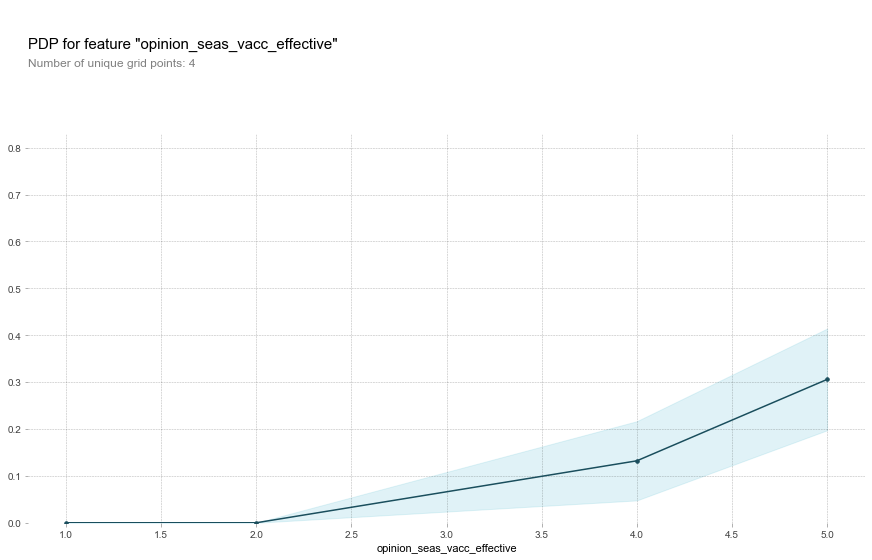

In [33]:
isolate = pdp_isolate(model_gbm_rf_man,
                      dataset = X2_test_imp,
                      model_features = X2_test_imp.columns,
                      feature = 'opinion_seas_vacc_effective')

pdp_plot(isolate, feature_name = 'opinion_seas_vacc_effective');

### PDP with Two Features

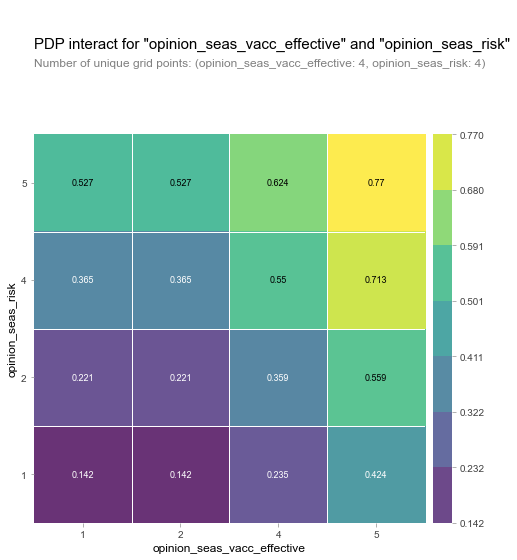

In [34]:
features = ['opinion_seas_vacc_effective', 'opinion_seas_risk']
interact = pdp_interact(model_gbm_rf_man,
                        dataset = X2_test_imp,
                        model_features = X2_test_imp.columns,
                        features=features)

pdp_interact_plot(interact, plot_type='grid', feature_names = features);

# Shapley Plots

In [176]:
samp = X2_test_imp.tail(1)
samp

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
12943,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,2.0,1.0,1.0,2.0,7.0,1.0,1.0,0.0,2.0,20.0


In [36]:
explainer = shap.TreeExplainer(model_gbm_rf_man)
shap_values = explainer.shap_values(samp)

shap.initjs()
shap.force_plot(base_value=explainer.expected_value,
                shap_values = shap_values,
                features=samp)

In [170]:
model_gbm_rf_man.predict_proba(samp)

array([[0.41832549, 0.58167451]])

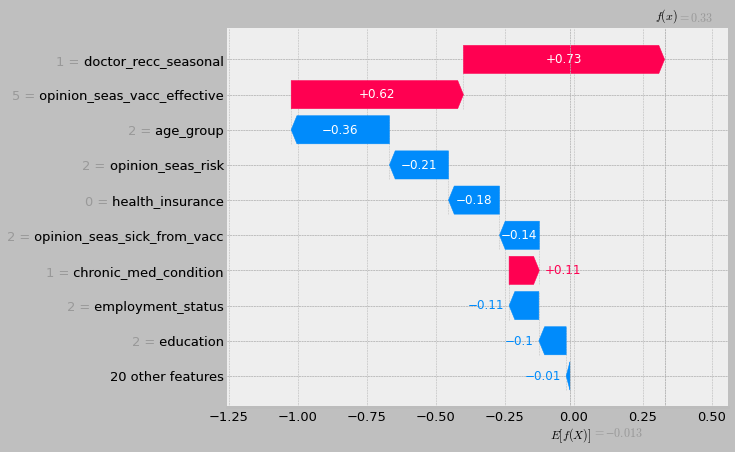

In [172]:
explainer=shap.TreeExplainer(model_gbm_rf_man, X2_test_imp)
shap_values=explainer(X2_test_imp)
shap.plots.waterfall(shap_values[-1])

In [38]:
# Build GridSearchCV:

param_grid = {
    
    'simpleimputer__strategy':['mean','most_frequent','constant'],
    'gradientboostingclassifier__learning_rate': [0.001,0.2],
    'gradientboostingclassifier__n_estimators': [100],
    'gradientboostingclassifier__max_depth': [3],
    'gradientboostingclassifier__n_iter_no_change': [10],
    'gradientboostingclassifier__random_state': [42],
    'gradientboostingclassifier__max_features': ['auto']
   
}

model_gbm_rfgs = GridSearchCV(
    model_gbm_rf,
    param_grid = param_grid,
    n_jobs = -1,
    cv = 5,
    verbose = 1
)
model_gbm_rfgs.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder',
                                        OrdinalEncoder(cols=['age_group',
                                                             'education',
                                                             'race', 'sex',
                                                             'income_poverty',
                                                             'marital_status',
                                                             'rent_or_own',
                                                             'employment_status',
                                                             'hhs_geo_region',
                                                             'census_msa',
                                                             'employment_industry',
                                                             'employment_occupation'],
                                                       map

In [39]:
model_gbm_rfgs.best_params_

{'gradientboostingclassifier__learning_rate': 0.2,
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__max_features': 'auto',
 'gradientboostingclassifier__n_estimators': 100,
 'gradientboostingclassifier__n_iter_no_change': 10,
 'gradientboostingclassifier__random_state': 42,
 'simpleimputer__strategy': 'mean'}

In [40]:
model_gbm_rfgs.best_score_

0.7836648724549496

In [41]:
print('GBM Training Accuracy (with best parameters) Score is ', model_gbm_rfgs.score(X_train, y_train))
print('GBM Testing Accuracy (with best parameters) Score is ', model_gbm_rfgs.score(X_test, y_test))

GBM Training Accuracy (with best parameters) Score is  0.7926983384039317
GBM Testing Accuracy (with best parameters) Score is  0.7942718083114938


In [42]:
model_gbm_rf = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    GradientBoostingClassifier(random_state=42,
                               learning_rate=0.2,
                               max_depth=3,
                               max_features='auto',
                               n_estimators=100,
                               n_iter_no_change=10)
                            )

model_gbm_rf.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['age_group', 'education', 'race', 'sex',
                                      'income_poverty', 'marital_status',
                                      'rent_or_own', 'employment_status',
                                      'hhs_geo_region', 'census_msa',
                                      'employment_industry',
                                      'employment_occupation'],
                                mapping=[{'col': 'age_group',
                                          'data_type': dtype('O'),
                                          'mapping': 45 - 54 Years    1
35 - 44 Years    2
65+ Years        3
55 - 64 Years    4
18 - 34 Years...
mxkfnird     8
tfqavkke     9
dlvbwzss    10
qxajmpny    11
haliazsg    12
hfxkjkmi    13
oijqvulv    14
xzmlyyjv    15
cmhcxjea    16
vlluhbov    17
pvmttkik    18
uqqtjvyb    19
bxpfxfdn    20
hodpvpew    21
xqwwgdyp    22
ccgxvspp    23
dcjcmpih    24
dtype: int64}

In [43]:
print(model_gbm_rf.score(X_train, y_train))
print(model_gbm_rf.score(X_test, y_test))

0.7926983384039317
0.7942718083114938


## Feature Selection for our best performing model (Gradient Boosting)

### Feature Importance:

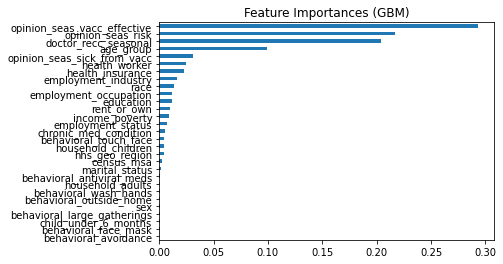

In [44]:
importances_gbm_rf =  model_gbm_rf.named_steps['gradientboostingclassifier'].feature_importances_
feature_names_gbm_rf = X_train.columns
feat_imp_gbm_rf = pd.Series(data=importances_gbm_rf, index=feature_names_gbm_rf).sort_values()
feat_imp_gbm_rf.tail(30).plot(kind='barh')
plt.title('Feature Importances (GBM)');

### Permutation Improtance:

Text(0.5, 1.0, 'Permutation Importances (GBM)')

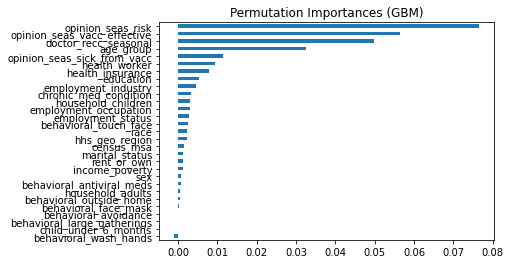

In [45]:
perm_imp_gbm_rf = permutation_importance(model_gbm_rf, X_test, y_test, random_state=42)
data_gbm_rf = {'imp_mean': perm_imp_gbm_rf['importances_mean'],
        'imp_std': perm_imp_gbm_rf['importances_std']
        }
df_perm_gbm_rf = pd.DataFrame(data_gbm_rf, index=X_test.columns).sort_values(by='imp_mean')
df_perm_gbm_rf['imp_mean'].tail(30).plot(kind='barh')
plt.title('Permutation Importances (GBM)')

In [46]:
X2_train = X_train.drop(columns=['household_adults', 'behavioral_avoidance'])
X2_test = X_test.drop(columns=['household_adults', 'behavioral_avoidance'])

In [47]:
# Rebuild a model with the best parameters identified with GridSearchCV:

model_gbm_rf2 = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    GradientBoostingClassifier(random_state=42,
                               learning_rate=0.2,
                               max_depth=3,
                               max_features='auto',
                               n_estimators=100,
                               n_iter_no_change=10)
                            )

model_gbm_rf2.fit(X2_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['age_group', 'education', 'race', 'sex',
                                      'income_poverty', 'marital_status',
                                      'rent_or_own', 'employment_status',
                                      'hhs_geo_region', 'census_msa',
                                      'employment_industry',
                                      'employment_occupation'],
                                mapping=[{'col': 'age_group',
                                          'data_type': dtype('O'),
                                          'mapping': 45 - 54 Years    1
35 - 44 Years    2
65+ Years        3
55 - 64 Years    4
18 - 34 Years...
mxkfnird     8
tfqavkke     9
dlvbwzss    10
qxajmpny    11
haliazsg    12
hfxkjkmi    13
oijqvulv    14
xzmlyyjv    15
cmhcxjea    16
vlluhbov    17
pvmttkik    18
uqqtjvyb    19
bxpfxfdn    20
hodpvpew    21
xqwwgdyp    22
ccgxvspp    23
dcjcmpih    24
dtype: int64}

In [48]:
print('GBM Training Accuracy Score is (dropped least imp features): ', model_gbm_rf2.score(X2_train, y_train))
print('GBM Testing Accuracy Score is (dropped least imp features): ', model_gbm_rf2.score(X2_test, y_test))

GBM Training Accuracy Score is (dropped least imp features):  0.7963023636789142
GBM Testing Accuracy Score is (dropped least imp features):  0.796518157993261


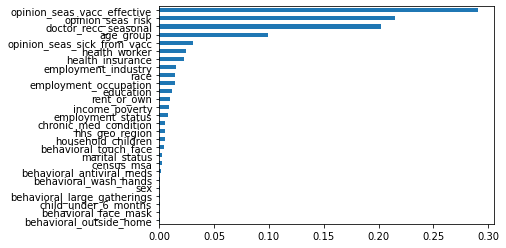

In [49]:
importances_gbm_rf2 =  model_gbm_rf2.named_steps['gradientboostingclassifier'].feature_importances_
feature_names_gbm_rf2 = X2_train.columns
feat_imp_gbm_rf2 = pd.Series(data=importances_gbm_rf2, index=feature_names_gbm_rf2).sort_values()
feat_imp_gbm_rf2.tail(30).plot(kind='barh');

<AxesSubplot:>

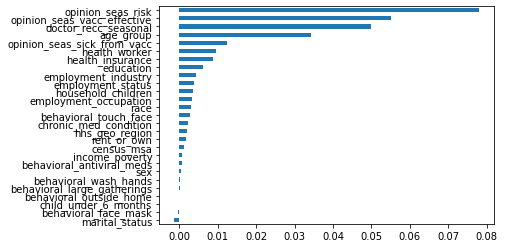

In [50]:
perm_imp_gbm_rf2 = permutation_importance(model_gbm_rf2, X2_test, y_test, random_state=42)
data_gbm_rf2 = {'imp_mean': perm_imp_gbm_rf2['importances_mean'],
        'imp_std': perm_imp_gbm_rf2['importances_std']
        }
df_perm_gbm_rf2 = pd.DataFrame(data_gbm_rf2, index=X2_test.columns).sort_values(by='imp_mean')
df_perm_gbm_rf2['imp_mean'].tail(30).plot(kind='barh')

# Model Evaluation

### Confusion Matrix:

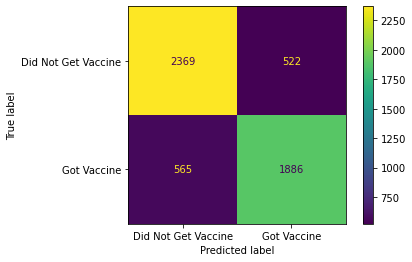

In [51]:
plot_confusion_matrix(model_gbm_rf2, X2_test, y_test, values_format = '.0f',display_labels=['Did Not Get Vaccine','Got Vaccine']);

In [52]:
print(classification_report(y_test, model_gbm_rf2.predict(X2_test), target_names = ['Did Not Get Vaccine','Got Vaccine']))

                     precision    recall  f1-score   support

Did Not Get Vaccine       0.81      0.82      0.81      2891
        Got Vaccine       0.78      0.77      0.78      2451

           accuracy                           0.80      5342
          macro avg       0.80      0.79      0.79      5342
       weighted avg       0.80      0.80      0.80      5342



### ROC Curve Analysis:

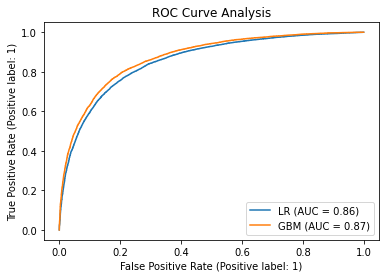

In [53]:
# ROC Curves of our two best performing models:

lr = plot_roc_curve(model_lr, X_train, y_train, name='LR')
gbm_rf2 = plot_roc_curve(model_gbm_rf2, X2_train, y_train, ax=lr.ax_, name='GBM')
plt.title('ROC Curve Analysis');

In [54]:
# Save the model to a file:

# dump(model_gbm_rf2, 'model27', compress=True)

# Build a New Model just for Heroku App (with reduced number of features )

In [98]:
# Limiting our new X matrix to 8 most important features (per feature imprtance & permutation importance of the main model):

X_train8 = X2_train.copy()[['opinion_seas_vacc_effective', 'opinion_seas_risk',
       'doctor_recc_seasonal', 'age_group', 'opinion_seas_sick_from_vacc',
       'health_worker', 'health_insurance','education']]
y_train8 = y_train.copy() # y vector is the same but let's rename it for consistency purposes


X_test8 = X2_test.copy()[['opinion_seas_vacc_effective', 'opinion_seas_risk',
       'doctor_recc_seasonal', 'age_group', 'opinion_seas_sick_from_vacc',
       'health_worker', 'health_insurance','education']]
y_test8 = y_test.copy() # y vector is the same but let's rename it for consistency purposes

In [100]:
X_train8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21365 entries, 24706 to 23654
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   opinion_seas_vacc_effective  20994 non-null  float64
 1   opinion_seas_risk            20955 non-null  float64
 2   doctor_recc_seasonal         19629 non-null  float64
 3   age_group                    21365 non-null  object 
 4   opinion_seas_sick_from_vacc  20934 non-null  float64
 5   health_worker                20722 non-null  float64
 6   health_insurance             21365 non-null  float64
 7   education                    20240 non-null  object 
dtypes: float64(6), object(2)
memory usage: 1.5+ MB


In [95]:
# Build new model (with reduced features):

model_gbm_rf8 = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    GradientBoostingClassifier(random_state=42)
)

model_gbm_rf8.fit(X_train8, y_train8)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['age_group', 'education'],
                                mapping=[{'col': 'age_group',
                                          'data_type': dtype('O'),
                                          'mapping': 45 - 54 Years    1
35 - 44 Years    2
65+ Years        3
55 - 64 Years    4
18 - 34 Years    5
NaN             -2
dtype: int64},
                                         {'col': 'education',
                                          'data_type': dtype('O'),
                                          'mapping': Some College        1
College Graduate    2
NaN                 3
12 Years            4
< 12 Years          5
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [101]:
# Check metrics:

print('GBM8 Training Accuracy Score is (reduced to 8 features): ', model_gbm_rf8.score(X_train8, y_train8))
print('GBM8 Testing Accuracy Score is (reduced to 8 features): ', model_gbm_rf8.score(X_test8, y_test8))

GBM8 Training Accuracy Score is (reduced to 8 features):  0.7797800140416569
GBM8 Testing Accuracy Score is (reduced to 8 features):  0.7850992137776114


In [116]:
# # Build GridSearchCV for the new reduced model:

# model_gbm_rf8 = make_pipeline(
#     OrdinalEncoder(), 
#     SimpleImputer(), 
#     GradientBoostingClassifier(random_state=42)
# )

# # model_gbm_rf8.fit(X_train8, y_train8)

# param_grid8 = {
    
#     'simpleimputer__strategy':['mean','most_frequent','constant'],
#     'gradientboostingclassifier__learning_rate': [0.001,0.2],
#     'gradientboostingclassifier__n_estimators': [80,100,120],
#     'gradientboostingclassifier__max_depth': [2,3,4],
#     'gradientboostingclassifier__n_iter_no_change': [10],
#     'gradientboostingclassifier__random_state': [42],
#     'gradientboostingclassifier__max_features': ['auto']
   
# }

# model_gbm_rfgs8 = GridSearchCV(
#     model_gbm_rf8,
#     param_grid = param_grid8,
#     n_jobs = -1,
#     cv = 5,
#     verbose = 1
# )
# model_gbm_rfgs8.fit(X_train8, y_train8)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__learning_rate': [0.001,
                                                                       0.2],
                         'gradientboostingclassifier__max_depth': [2, 3, 4],
                         'gradientboostingclassifier__max_features': ['auto'],
                         'gradientboostingclassifier__n_estimators': [80, 100,
                                                                      120],
                         'gradientboostingclassifier__n_iter_no_change': [10],
                         'gradientboostingclassifier__random_state': [42],
                         's

In [117]:
# model_gbm_rfgs8.best_params_

{'gradientboostingclassifier__learning_rate': 0.2,
 'gradientboostingclassifier__max_depth': 2,
 'gradientboostingclassifier__max_features': 'auto',
 'gradientboostingclassifier__n_estimators': 100,
 'gradientboostingclassifier__n_iter_no_change': 10,
 'gradientboostingclassifier__random_state': 42,
 'simpleimputer__strategy': 'constant'}

In [118]:
# Check metrics with best parameters:

# print('GBM8 Training Accuracy "Best" Score is (reduced to 8 features): ', model_gbm_rfgs8.best_estimator_.score(X_train8, y_train8))
# print('GBM8 Testing Accuracy "Best" Score is (reduced to 8 features): ', model_gbm_rfgs8.best_estimator_.score(X_test8, y_test8))

GBM8 Training Accuracy "Best" Score is (reduced to 8 features):  0.7781418207348467
GBM8 Testing Accuracy "Best" Score is (reduced to 8 features):  0.786035192811681


In [125]:
# Rebuild model using best parameters:

model_gbm_rf8 = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(strategy='constant'), 
    GradientBoostingClassifier(random_state=42,
                               learning_rate=0.2,
                               max_depth=2,
                               max_features='auto',
                               n_estimators=80,
                               n_iter_no_change=10)
                             )

model_gbm_rf8.fit(X_train8, y_train8)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['age_group', 'education'],
                                mapping=[{'col': 'age_group',
                                          'data_type': dtype('O'),
                                          'mapping': 45 - 54 Years    1
35 - 44 Years    2
65+ Years        3
55 - 64 Years    4
18 - 34 Years    5
NaN             -2
dtype: int64},
                                         {'col': 'education',
                                          'data_type': dtype('O'),
                                          'mapping': Some College        1
College Graduate    2
NaN                 3
12 Years            4
< 12 Years          5
dtype: int64}])),
                ('simpleimputer', SimpleImputer(strategy='constant')),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=2,
                                            max_features='auto',
                    

In [126]:
# Check metrics with best parameters:

print('GBM8 Training Accuracy Score with Best Parameters is (reduced to 8 features): ', model_gbm_rf8.score(X_train8, y_train8))
print('GBM8 Testing Accuracy Score Best Parameters is (reduced to 8 features): ', model_gbm_rf8.score(X_test8, y_test8))

GBM8 Training Accuracy Score with Best Parameters is (reduced to 8 features):  0.7779545986426398
GBM8 Testing Accuracy Score Best Parameters is (reduced to 8 features):  0.7869711718457506


In [127]:
# Save the reduced model to a joblib file:

# dump(model_gbm_rf8, 'model8', compress=True)

['model8']

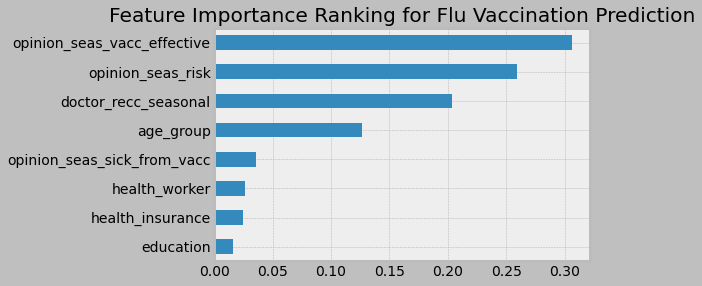

In [169]:
# Plot feature importances for the new reduced model:

importances_gbm_rf8 =  model_gbm_rf8.named_steps['gradientboostingclassifier'].feature_importances_
feature_names_gbm_rf8 = X_train8.columns
feat_imp_gbm_rf8 = pd.Series(data=importances_gbm_rf8, index=feature_names_gbm_rf8).sort_values()
ax = feat_imp_gbm_rf8.tail(8).plot(kind='barh')
plt.title('Feature Importance Ranking for Flu Vaccination Prediction')
# ax.patch.set_facecolor('blue')
# ax.set_facecolor('gray')
plt.style.use('bmh');

In [55]:
# # Training ROC data:

# pd.set_option('max_rows', 99999)

# # Get predicted probabilities from model
# y_pred_prob_train = model_gbm_rf2.predict_proba(X2_train)[:, -1]

# # Input true labels and probability predictions
# fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_prob_train)

# # Put data into dictionary
# data_train = {'false_pos_rate': fpr_train,
#         'true_pos_rate': tpr_train, 
#         'thresholds': thresholds_train}

# pd.DataFrame(data_train)


In [56]:
# data_pred_train = {'y_train': y_train,
#         'y_pred_prob_train': model_gbm_rf2.predict_proba(X2_train)[:,-1]}
# pred_train = pd.DataFrame(data_pred_train)

In [57]:
# Adjust Training threshold to 45%:

# pred_train.loc[pred_train['y_pred_prob_train'] > 0.45, 'y_pred_train_45'] = 1
# pred_train.loc[pred_train['y_pred_prob_train'] <= 0.45, 'y_pred_train_45'] = 0

In [58]:
# pred_train#[(pred['y_pred_prob'] > 0.40) & (pred['y_pred_prob'] < 0.52)]


In [59]:
# # Testing ROC data:

# pd.set_option('max_rows', 99999)

# # Get predicted probabilities from model
# y_pred_prob_test = model_gbm_rf2.predict_proba(X2_test)[:, -1]

# # Input true labels and probability predictions
# fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_prob_test)

# # Put data into dictionary
# data_test = {'false_pos_rate': fpr_test,
#         'true_pos_rate': tpr_test, 
#         'thresholds': thresholds_test}

# pd.DataFrame(data_test)


In [60]:
# data_pred_test = {'y_test': y_test,
#         'y_pred_prob_test': model_gbm_rf2.predict_proba(X2_test)[:,-1]}
# pred_test = pd.DataFrame(data_pred_test)

In [61]:
# # Adjust Test threshold to 45%:

# pred_test.loc[pred_test['y_pred_prob_test'] > 0.45, 'y_pred_test_45'] = 1
# pred_test.loc[pred_test['y_pred_prob_test'] <= 0.45, 'y_pred_test_45'] = 0

In [62]:
# pred_test

In [63]:
# print('GBM-RF2 Training Accuracy (with default 50% threshold) Score is ', model_gbm_rf2.score(X2_train, y_train))
# print('GBM-RF2 Test Accuracy (with default 50% threshold) Score is ', model_gbm_rf2.score(X2_test, y_test))

# print('\nGBM-RF2 Training Accuracy (with adjusted 45% threshold) Score is ', accuracy_score(y_train, pred_train['y_pred_train_45']))
# print('GBM-RF2 Test Accuracy (with adjusted 45% threshold) Score is ', accuracy_score(y_test, pred_test['y_pred_test_45']))

In [64]:
# Classification report with the adjusted 45% threshold
# (The recall accuracy increased but overall accuracy went down)

# print(classification_report(y_test, pred_test['y_pred_test_45'], target_names = ['Did Not Get Vaccine','Got Vaccine']))

## Modify Model

In [65]:
### DID NOT UTILIZE THIS AS IT DECREASED THE ACCURACY SCORE:

# Combine all 'behavioral_%' type columns into one by summing them up:

# behavioral_cols = [col for col in X2_train.columns if 'behavioral' in col]

# X3_train = X2_train.copy()
# X3_train['behavioral'] = X2_train[behavioral_cols].sum(axis=1)
# X3_train.drop(columns=behavioral_cols, inplace=True)

# X3_val = X2_val.copy()
# X3_val['behavioral'] = X2_val[behavioral_cols].sum(axis=1)
# X3_val.drop(columns=behavioral_cols, inplace=True)

In [66]:
# Build a model with reduced 'behavioral_%' columns:

# model_gbm_rf3 = make_pipeline(
#     OrdinalEncoder(), 
#     SimpleImputer(), 
#     GradientBoostingClassifier(random_state=42)
#                             )

#model_gbm_rf3.fit(X3_train, y_train)

In [67]:
# Build GridSearchCV:

# param_grid3 = {
    
#     'simpleimputer__strategy':['mean','mode','most_frequent'],
#     'gradientboostingclassifier__learning_rate': [0.2,0.3],
#     'gradientboostingclassifier__n_estimators': [80,100],
#     'gradientboostingclassifier__max_depth': [3],
#     'gradientboostingclassifier__n_iter_no_change': [10],
#     'gradientboostingclassifier__random_state': [42],
#     'gradientboostingclassifier__max_features': ['auto']
   
# }

# model_gbm_rfgs3 = GridSearchCV(
#     model_gbm_rf3,
#     param_grid = param_grid3,
#     n_jobs = -1,
#     cv = 5,
#     verbose = 1
# )
# model_gbm_rfgs3.fit(X3_train, y_train)

In [68]:
# model_gbm_rfgs3.best_params_
# {'gradientboostingclassifier__learning_rate': 0.2,
#  'gradientboostingclassifier__max_depth': 3,
#  'gradientboostingclassifier__max_features': 'auto',
#  'gradientboostingclassifier__n_estimators': 100,
#  'gradientboostingclassifier__n_iter_no_change': 10,
#  'gradientboostingclassifier__random_state': 42,
#  'simpleimputer__strategy': 'mean'}

In [69]:
# print(model_gbm_rfgs3.score(X3_train, y_train))
# print(model_gbm_rfgs3.score(X3_val, y_val))
# 0.7931195881113972
# 0.7929614376637963

In [70]:
### DID NOT UTILIZE THIS AS IT DECREASED THE ACCURACY SCORE:

# X4_train = X2_train[['opinion_seas_risk','opinion_seas_vacc_effective','doctor_recc_seasonal','age_group',
#                      'opinion_seas_sick_from_vacc','health_insurance','health_worker','education','employment_industry',
#                      'household_children','chronic_med_condition','race','employment_occupation','behavioral_touch_face',
#                      'rent_or_own','hhs_geo_region','marital_status','behavioral_antiviral_meds','income_poverty',
#                      'employment_status']].copy().astype('category')

# X4_val = X2_val[['opinion_seas_risk','opinion_seas_vacc_effective','doctor_recc_seasonal','age_group',
#                      'opinion_seas_sick_from_vacc','health_insurance','health_worker','education','employment_industry',
#                      'household_children','chronic_med_condition','race','employment_occupation','behavioral_touch_face',
#                      'rent_or_own','hhs_geo_region','marital_status','behavioral_antiviral_meds','income_poverty',
#                      'employment_status']].copy().astype('category')